In [13]:
import asyncio
from asyncio import PriorityQueue
from random import randrange
from time import time
import nest_asyncio
from matplotlib.patches import Patch
from objects import Mechanic, Car
import matplotlib.pyplot as plt

In [14]:
nest_asyncio.apply()  
car_data = [] # array to store times of car repairs (used for plotting data) 
mechanic_data = []
async def main():
    ### SIMULATION START ###
    global car_data
    global mechanics
    global mechanic_data
    global simulation_start_time
    car_queue = PriorityQueue()  # Create a shared queue for cars
    num_cars = 10  # Total number of cars arriving for repair

    # Initialize mechanics with varying efficiency (repair time) and work hours
    mechanic1 = Mechanic(id=1, efficiency=2, work_hours=10)
    mechanic2 = Mechanic(id=2, efficiency=3, work_hours=10)
    mechanic3 = Mechanic(id=3, efficiency=1, work_hours=6)
    mechanics = [mechanic1, mechanic2, mechanic3]
    
    # Start the enqueue and mechanic processes concurrently
    simulation_start_time = time()
    await asyncio.gather(
        Car.enqueue_cars(car_queue, num_cars),
        mechanic1.work(car_queue),
        mechanic2.work(car_queue),
        mechanic3.work(car_queue)
    )
    for mechanic in mechanics:
        car_data += mechanic.spent_times   

await main()

Car 1 with 0 priority added to the queue.
Mechanic 1 started repairing car 1 with 0 priority. It will take 2.5 hours.
Mechanic 2 is waiting for cars to repair.
Mechanic 3 is waiting for cars to repair.
Mechanic 2 is waiting for cars to repair.
Mechanic 3 is waiting for cars to repair.
Car 2 with 0 priority added to the queue.
Mechanic 2 started repairing car 2 with 0 priority. It will take 0.3333333333333333 hours.
Mechanic 3 is waiting for cars to repair.
Mechanic 3 is waiting for cars to repair.
Mechanic 2 finished repairing car 2. It took 1 hours.
Car 3 with 2 priority added to the queue.
Mechanic 3 started repairing car 3 with 2 priority. It will take 2.0 hours.
Mechanic 2 is waiting for cars to repair.
Car 4 with 1 priority added to the queue.
Mechanic 2 started repairing car 4 with 1 priority. It will take 2.6666666666666665 hours.
Car 5 with 0 priority added to the queue.
Mechanic 1 finished repairing car 1. It took 5 hours.
Car 6 with 1 priority added to the queue.
Mechanic 1 s

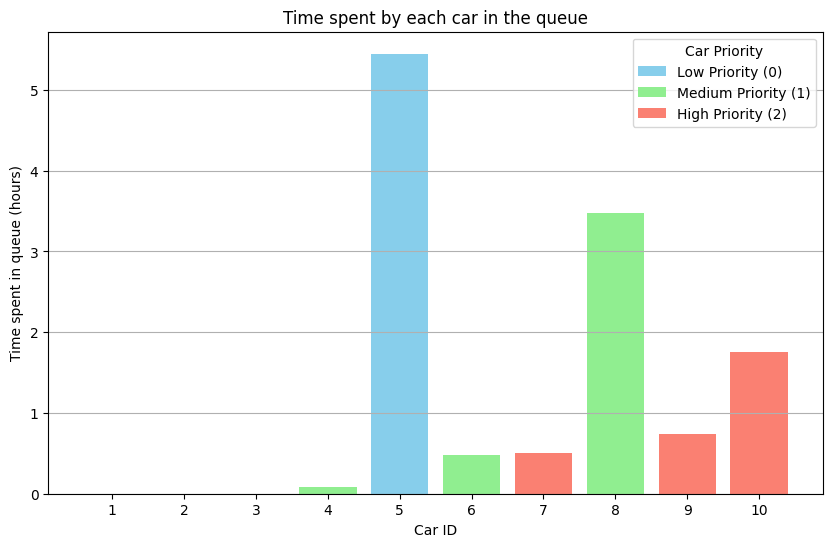

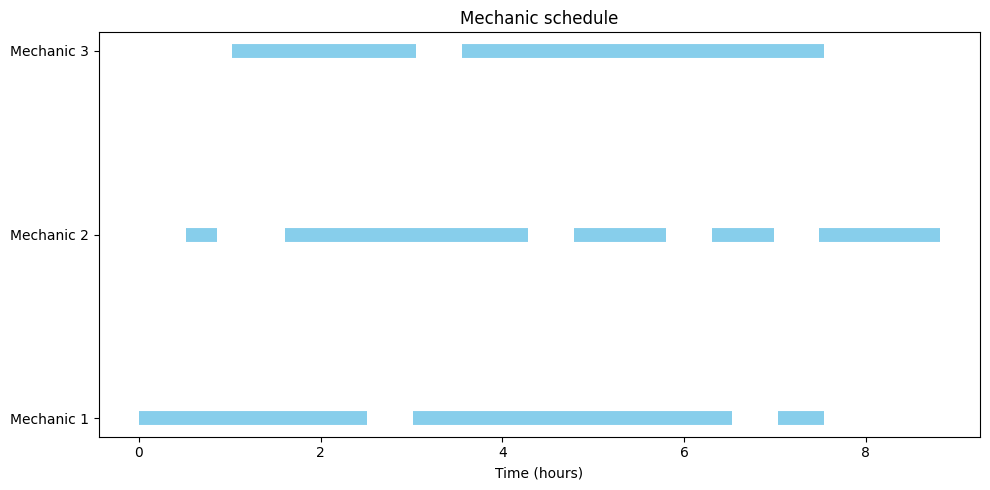

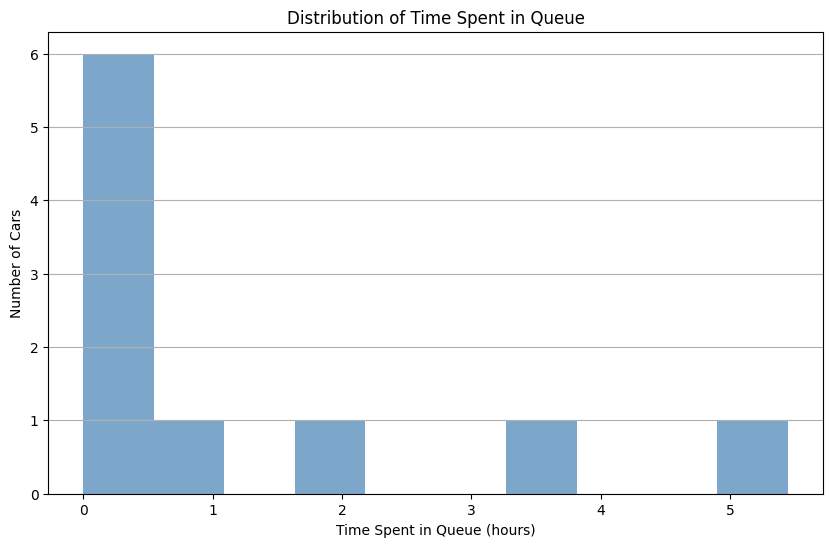

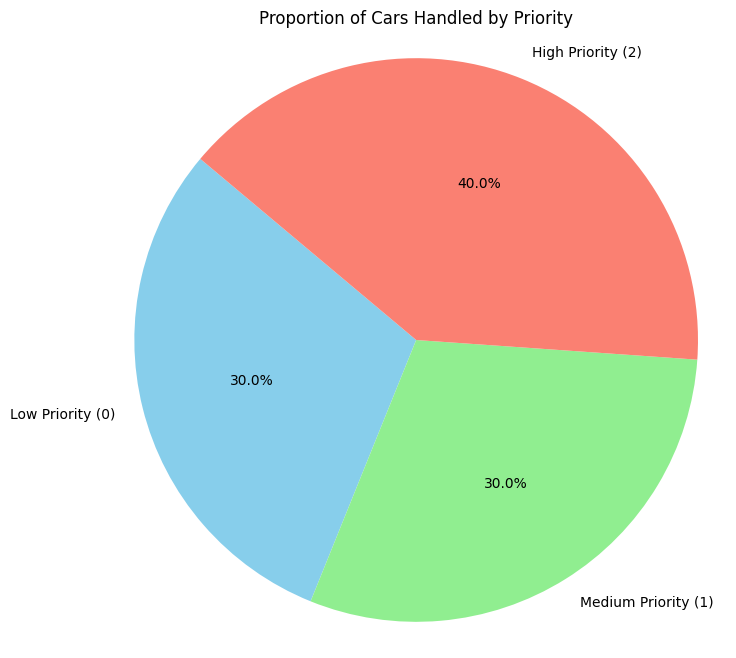

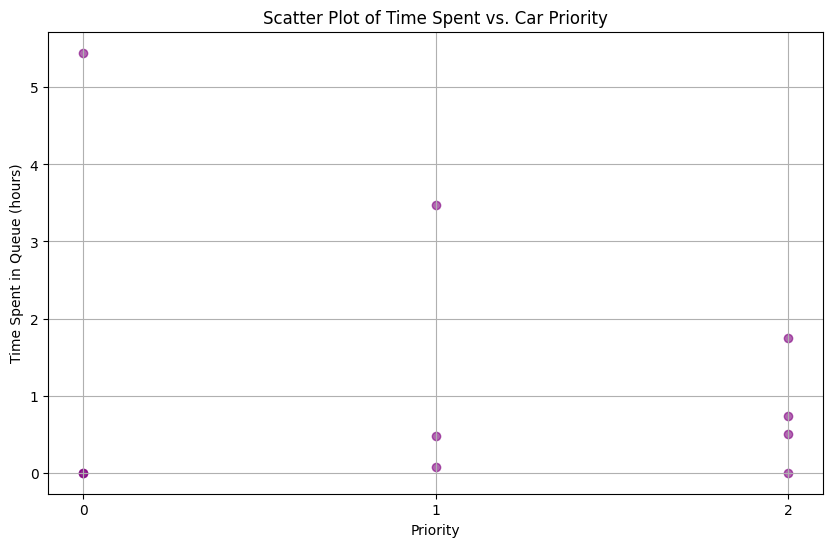

In [15]:
if car_data:
    ####################################
    ### PROCESSING DATA FOR PLOTS (CARS) 
    car_ids = [car_id for car_id, _, _, _, _ in car_data]
    times_spent = [time for _, time, _, _, _ in car_data]
    priorities = [priority for _, _, priority, _, _ in car_data]
    
    color_map = {0: 'skyblue', 1: 'lightgreen', 2: 'salmon'}
    colors = [color_map[priority] for priority in priorities]

    # Create the bar plot
    plt.figure(figsize=(10, 6))
    plt.bar(car_ids, times_spent, color=colors)
    plt.xlabel('Car ID')
    plt.ylabel('Time spent in queue (hours)')
    plt.title('Time spent by each car in the queue')
    plt.xticks(car_ids)  # Set x-ticks to be the car IDs
    plt.grid(axis='y')
    # Create legend elements
    legend_elements = [
        Patch(facecolor='skyblue', label='Low Priority (0)'),
        Patch(facecolor='lightgreen', label='Medium Priority (1)'),
        Patch(facecolor='salmon', label='High Priority (2)')
    ]
    plt.legend(handles=legend_elements, title="Car Priority")
    # Show the plot
    plt.show()
    
    #########################################
    ### PROCESSING DATA FOR PLOTS (MECHANICS)
    for index, mechanic in enumerate(mechanics):
        mechanic_data += (index + 1, mechanic.spent_times)
    
    mechanics_id = []
    mechanics_times = []

    for i in range(0, len(mechanic_data), 2):
        mech_id = mechanic_data[i]
        mechanic_entries = mechanic_data[i + 1]
        
        mechanics_id.append(mech_id)
        times = [(start - simulation_start_time, end - simulation_start_time) for _, _, _, start, end in mechanic_entries]
        mechanics_times.append(times)
        
    fig, ax = plt.subplots(figsize=(10, 5))

    # Plot for each mechanic
    for i, times in enumerate(mechanics_times):
        for start, end in times:
            ax.plot([start, end], [i, i], color="skyblue", linewidth=10, solid_capstyle="butt")
            
    # Customize the plot
    ax.set_yticks(range(len(mechanics_times)))
    ax.set_yticklabels([f"Mechanic {i + 1}" for i in range(len(mechanics_times))])
    ax.set_xlabel("Time (hours)")
    ax.set_title("Mechanic schedule")

    plt.tight_layout()
    plt.show()
    
    plt.figure(figsize=(10, 6))
    plt.hist(times_spent, bins=10, color='steelblue', alpha=0.7)
    plt.xlabel('Time Spent in Queue (hours)')
    plt.ylabel('Number of Cars')
    plt.title('Distribution of Time Spent in Queue')
    plt.grid(axis='y')
    plt.show()
    
    priority_counts = [0, 0, 0]  
    for _, _, priority, _, _ in car_data:
        priority_counts[priority] += 1
    
    plt.figure(figsize=(8, 8))
    plt.pie(priority_counts, labels=['Low Priority (0)', 'Medium Priority (1)', 'High Priority (2)'],
            autopct='%1.1f%%', startangle=140, colors=['skyblue', 'lightgreen', 'salmon'])
    plt.title('Proportion of Cars Handled by Priority')
    plt.axis('equal')  
    plt.show()
    
    plt.figure(figsize=(10, 6))
    plt.scatter(priorities, times_spent, color='purple', alpha=0.6)
    plt.xlabel('Priority')
    plt.ylabel('Time Spent in Queue (hours)')
    plt.title('Scatter Plot of Time Spent vs. Car Priority')
    plt.xticks([0, 1, 2])  
    plt.grid(True)
    plt.show()
else:
    print("No data available to plot.")